<a href="https://colab.research.google.com/github/kirujaglor/Accident-Severity-Prediction-Model/blob/main/AccidentSeverityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Accident Severity is my dependent variable which I will represent using a scale of 1(minor) to 5(fatal).
#1=Minor Accident (No injuries, minimal damage)
#2= Moderate Accident (Some injuries, moderate damage)
#3=Serious Accident (Severe injuries, significant damage)
#4=Critical Accident (Life-threatening injuries, extensive damage)
#5=Fatal Accident (Fatalities)

#Below are my independent variables clearly described to enable me to represent them numerically in the csv file.

#For Weather Conditions: 1=Sunny, 2=Rainy, 3=Snowy
#Road Surface Conditions: 1=Dry, 2=Wet, 3=Icy
#Time of Day: = 1=Morning, 2=Afternoon, 3=Evening, 4=Night
#Road Type: 1=Highway, 2=Street, 3=Rural Road, 4=Other
#Speed Limit is in (mph)
#Traffic Density: 1=Low, 2=Moderate, 3=High
#Driver Age
#Driver Gender: 1=Male, 2=Female
#Presence of Traffic Signals: 1=Yes, 0=No
#Driver Impairment: 0=No Drugs, 1: on Drugs
#Vehicle Type: 1=Car, 2=Motorcycle, 3=Truck
#Seatbelt Usage: 1=Yes, 0=No
#Presence of Warning Signs: 1=Yes, 0=No
#Presence of Street Lights: 1=Yes, 0=No

import pandas as pd
kiruja = pd.read_csv('/content/AccidentSeverityPrediction.csv')
print("Shape of the dataset:",kiruja.shape)
kiruja.head(14)

Shape of the dataset: (9, 14)


,Weather_Conditions,Road_Surface_Conditions,Time of Day,Road Type,Speed Limit,Traffic Density,Driver Age,Driver Gender,Driver Impairment,Vehicle Type,Seatbelt Usage,Warning Signs,Street Lights,Accident Severity
0,1,2,3,1,45,2,30,1,1,1,1,1,1,3
1,2,3,2,2,30,1,40,2,0,1,0,1,2,2
2,3,1,4,3,60,3,25,1,1,1,1,0,1,4
3,1,2,1,2,45,2,35,2,1,1,1,0,2,3
4,2,3,2,1,30,1,40,1,0,0,0,1,1,2
5,3,1,4,2,60,3,25,2,1,0,1,0,2,4
6,1,2,1,3,45,2,35,1,1,1,1,0,1,3
7,2,3,2,2,30,1,40,2,0,1,0,1,2,2
8,3,1,4,1,60,3,25,1,1,1,1,0,1,4


In [3]:
#Driver impairment as dependent variable and Accident Severity as independent variable.
import pandas as pd
kiruja = pd.read_csv('/content/AccidentSeverityPrediction.csv')
data = kiruja.loc[:, ['Driver Impairment', 'Accident Severity']]
data.head(7)

,Driver Impairment,Accident Severity
0,1,3
1,0,2
2,1,4
3,1,3
4,0,2
5,1,4
6,1,3


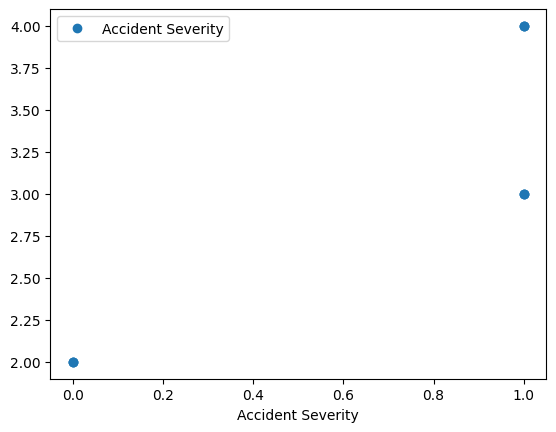

In [4]:
#To visualize the change in the variables.
import pandas as pd
import matplotlib.pyplot as plt
kiruja = pd.read_csv('/content/AccidentSeverityPrediction.csv')
kiruja.plot(x='Driver Impairment', y='Accident Severity',style='o')
plt.xlabel('Driver Impairment')
plt.xlabel('Accident Severity')
plt.show()

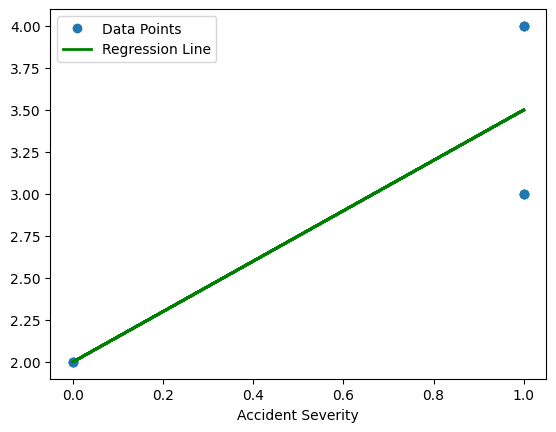

In [7]:
#To add a Regression Line
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
kiruja = pd.read_csv('/content/AccidentSeverityPrediction.csv')
X = kiruja[['Driver Impairment']]
y = kiruja['Accident Severity']
regressor = LinearRegression()
regressor.fit(X, y)
kiruja.plot(x='Driver Impairment', y='Accident Severity', style='o', label='Data Points')
plt.plot(X, regressor.predict(X), color='green',linewidth=2, label='Regression Line')
plt.xlabel('Driver Impairment')
plt.xlabel('Accident Severity')
plt.legend()
plt.show()


In [8]:
#Dividing data into independent and dependent variables
import pandas as pd
kiruja = pd.read_csv('/content/AccidentSeverityPrediction.csv')
x = pd.DataFrame(data['Driver Impairment'])
y = pd.DataFrame(data['Accident Severity'])



In [17]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
kiruja = pd.read_csv('/content/AccidentSeverityPrediction.csv')
x = pd.DataFrame(data['Driver Impairment'])
y = pd.DataFrame(data['Accident Severity'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=1)




In [18]:
#Shape of the train and test sets
print(X_train.shape)
print(X_train.shape)
print(y_train.shape)
print(y_train.shape)

(3, 1)
(3, 1)
(3, 1)
(3, 1)


In [19]:
#Training the algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [20]:
#Retrieving the intercept
print(regressor.intercept_)


[2.]


In [21]:
#Retrieving the slope
print(regressor.coef_)


[[1.5]]


In [22]:
#Glance of the predicted values
y_pred = regressor.predict(X_test)
y_pred


array([[3.5],
       [3.5],
       [3.5],
       [2. ],
       [2. ],
       [3.5]])

In [23]:
#The observed values of the dependent variable for the testing dataset
y_test.head(14)

,Accident Severity
8,4
2,4
6,3
7,2
1,2
0,3


In [25]:
#Evaluating the algorithm
from sklearn import metrics
import numpy as np
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error(RMSE):", rmse)



Mean Absolute Error (MAE): 0.3333333333333333
Mean Squared Error (MSE): 0.16666666666666666
Root Mean Squared Error(RMSE): 0.408248290463863


In [27]:
#Saving the linear regression model I have created
import joblib
import pickle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [31]:
#Using my trained model to test more data set
import joblib
import numpy as np
new_X = np.array([0, 0, 1, 0, 1]).reshape(-1, 1)
model = joblib.load('linear_regression_model.pkl')
predictions = model.predict(new_X)
new_data = pd.DataFrame({'X':
new_X.flatten(), 'Predicted_Y': predictions.flatten()})
print(new_data)

   X  Predicted_Y
0  0          2.0
1  0          2.0
2  1          3.5
3  0          2.0
4  1          3.5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
#CONCLUSION

#I utilized driver impairment as an independent variable in my linear regression model to predict accident severity since it holds
#a significant potential for traffic accident analysis and prevention in underdeveloped countries.

#This can be seen where the model predictions will serveas early warning system to public policy makers,
#law enforcement, and various stakeholders, helping them to make more informed decisions about how to reduce the number of traffic accidents.

#Additionally, this model can provide valuable insights about the effectiveness of different interventions such as;
#educational campaigns and enforcing stricter traffic regulations.

#By achieving the mentioned objectives, my model's prediction will help to reduce the
#number of traffic accidents and improve the safety of roads in these underdeveloped nations.
